In [3]:
#script to compute cross sections of density, and tends of T&S -- start with Density
import numpy as np
import time
import xarray
import glob

%pylab inline
pylab.rcParams['figure.figsize'] = (16,8) # Large figures
pylab.rcParams['image.cmap'] = 'seismic'
dpi=200;

### axis_font = {'fontname':'Arial', 'size':'18'}    
title_font = {'fontname':'Arial', 'size':'32', 'color':'black', 'weight':'normal'}
matplotlib.rc('xtick', labelsize=28)
matplotlib.rc('ytick', labelsize=28)

Populating the interactive namespace from numpy and matplotlib


In [2]:
me = xarray.open_dataset('/lcrc/group/acme/public_html/inputdata/ocn/mpas-o/EC30to60E2r2/mpaso.EC30to60E2r2-1900.rstFromG-anvil.200910.nc')
#tranReg = xarray.open_dataset('/compyfs/inputdata/ocn/mpas-o/EC30to60E2r2/EC30to60E2r2_moc_masks_and_transects.nc')
tranReg = xarray.open_dataset('/lcrc/group/acme/ac.vanroekel/EC30to60E2r2_oceanSubBasins20201008.nc')

In [31]:
test = '20201102_JRA_noRestoreBase_EC30to60r2'
flist2 = sorted(glob.glob('/lcrc/group/acme/ac.vanroekel/acme_scratch/anvil/'+test+'/run/*paso.hist.am.timeSeriesStatsMonthly.0004*'))
test = '20201028_BcaseForcing_EC30to60r2'
flist = sorted(glob.glob('/lcrc/group/acme/ac.vanroekel/acme_scratch/anvil/'+test+'/run/*paso.hist.am.timeSeriesStatsMonthly.0004*'))

In [14]:
lat = me.latCell.values
lon = me.lonCell.values
dv = me.dvEdge.values
dc = me.dcEdge.values
area = me.areaCell.values
eonc = me.edgesOnCell.values-1
cone = me.cellsOnEdge.values-1
nCells = me.dims['nCells']
ne = me.nEdgesOnCell.values
medge = me.dims['maxEdges']
nz = me.dims['nVertLevels']
mlc = me.maxLevelCell.values

In [32]:
ds = xarray.open_dataset(flist[0])
dsG = xarray.open_dataset(flist2[0])

In [12]:
edgeSignOnCell = np.zeros((nCells,medge))
for iCell in range(nCells):
    for i in range(ne[iCell]):
        iEdge = eonc[iCell,i]
        if iCell == cone[iEdge,0]:
            edgeSignOnCell[iCell,i] = -1
        else:
            edgeSignOnCell[iCell,i] = 1

In [27]:
def compute_divergence(nV,area,eonc,edgeSignOnCell,dv,k):
    divergence = np.zeros(nCells)
    for iCell in range(nCells):
        divergence[iCell] = 0.0
        invarea = 1.0/area[iCell]
        for i in range(ne[iCell]):
            iEdge = eonc[iCell,i]
            edgetmp = edgeSignOnCell[iCell,i]
            dvt = dv[iEdge]
            r = dvt*nV[iEdge,k]*invarea
            divergence[iCell] -= edgetmp*r
    return divergence

In [18]:
nV = ds.timeMonthly_avg_normalVelocity[0,:,:].values
nVG = ds.timeMonthly_avg_normalGMBolusVelocity[0,:,:].values

In [33]:
nV2 = dsG.timeMonthly_avg_normalVelocity[0,:,:].values
nVG2 = dsG.timeMonthly_avg_normalGMBolusVelocity[0,:,:].values

In [52]:
k=54
div = compute_divergence(nV,area,eonc,edgeSignOnCell,dv,k)
divGM = compute_divergence(nVG,area,eonc,edgeSignOnCell,dv,k)

div2 = compute_divergence(nV2,area,eonc,edgeSignOnCell,dv,k)
divGM2 = compute_divergence(nVG2,area,eonc,edgeSignOnCell,dv,k)

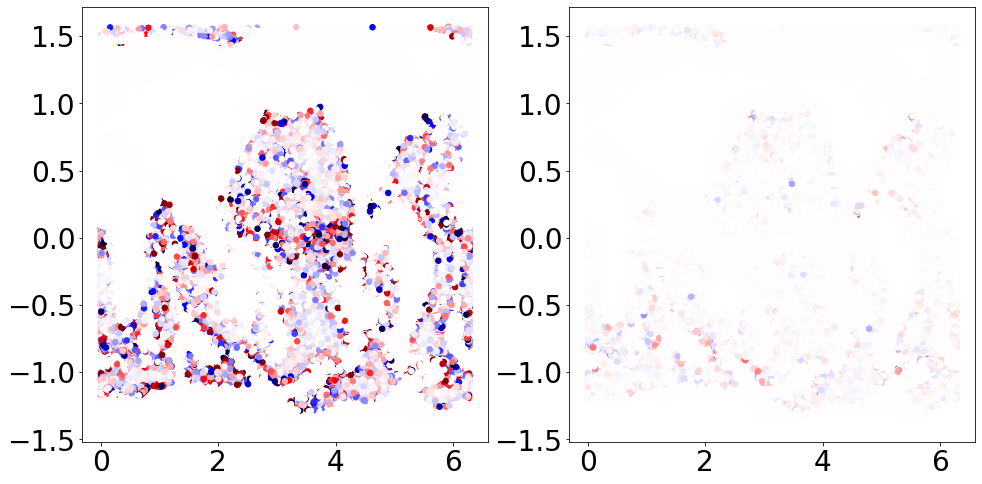

In [53]:
fig,ax=plt.subplots(1,2)
ax[0].scatter(lon,lat,s=30,c=div-div2,vmin=-1e-7,vmax=1e-7)
ax[1].scatter(lon,lat,s=30,c=divGM-divGM2,vmin=-1e-7,vmax=1e-7)

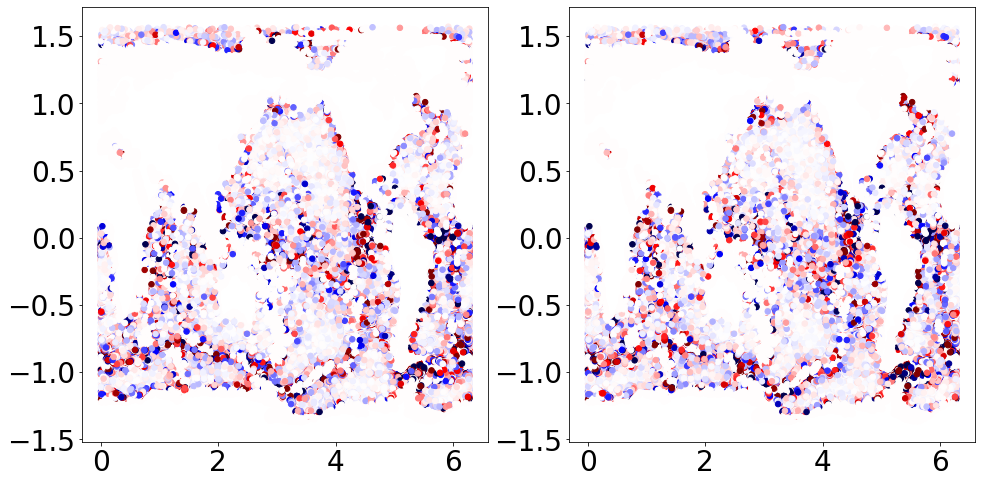

In [44]:
fig,ax=plt.subplots(1,2)
ax[0].scatter(lon,lat,s=30,c=div,vmin=-1e-7,vmax=1e-7)
ax[1].scatter(lon,lat,s=30,c=div2,vmin=-1e-7,vmax=1e-7)


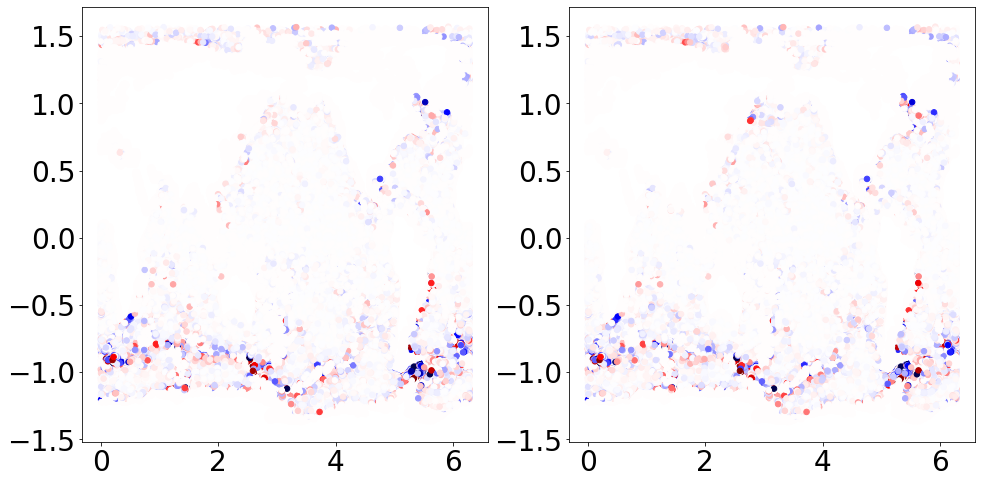

In [45]:
fig,ax=plt.subplots(1,2)
ax[0].scatter(lon,lat,s=30,c=divGM,vmin=-1e-7,vmax=1e-7)
ax[1].scatter(lon,lat,s=30,c=divGM2,vmin=-1e-7,vmax=1e-7)

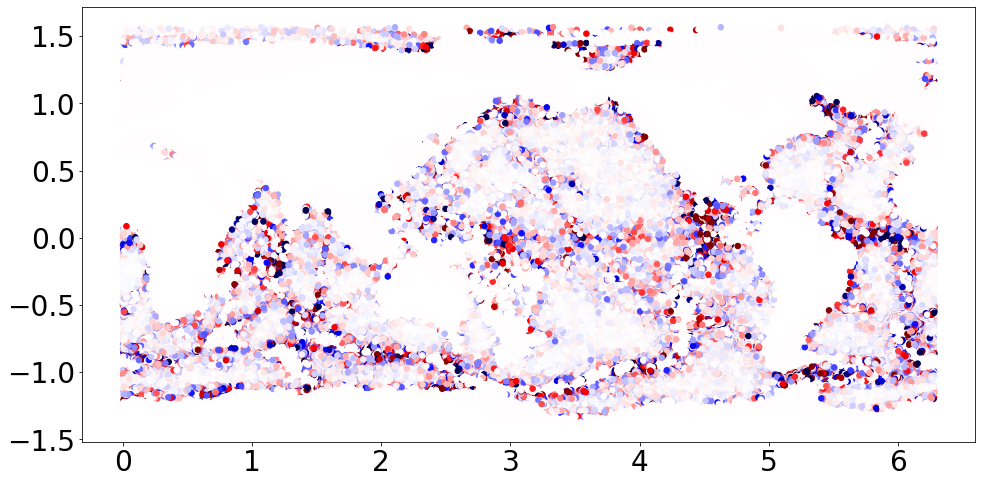

In [47]:
plt.scatter(lon,lat,s=30,c=div-div2,vmin=-1e-7,vmax=1e-7)